### Police Reported Crime Trends Analysis: West Yorkshire (April-September 2020)

#### 1. Introduction and Objectives

##### Background
This analysis examines crime data from West Yorkshire Police covering six months during 2020. This period is particularly interesting as it coincides with the early months of the COVID-19 pandemic and associated lockdown measures, which may have influenced crime patterns.


In [ ]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
print("\n1. DATA LOADING")
def load_crime_data(data_folder="../data"):
    months = ['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09']
    dataframes = []
    loading_summary = []
    print("Loading crime data files...")
    # Iterate through each month and load the corresponding file
    for month in months:
        # Construct the filename based on the month
        filename = f"{month}-west-yorkshire-street.csv"
        file_path = os.path.join(data_folder, filename)
        # Check if file exists
        if not os.path.exists(file_path):
            loading_summary.append({
                'Month': month,
                'Filename': filename,
                'Rows': 0,
                'Columns': 0,
                'Status': 'File not found'
            })
            print(f"✗ {month}: File not found - {filename}")
            continue     
        # Load the CSV file
        df = pd.read_csv(file_path)      
        dataframes.append(df)
        print(f"✓ {month}: {len(df):,} records loaded from {filename}")
    # Combine all dataframes
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        print(f"\n Successfully combined data from {len(dataframes)} files")
        print(f" Total records loaded: {len(combined_df):,}")
        return combined_df, pd.DataFrame(loading_summary)
        return None, pd.DataFrame(loading_summary)
# Load the data
crime_data, loading_summary = load_crime_data()


1. DATA LOADING
Loading crime data files...
✓ 2020-04: 21,785 records loaded from 2020-04-west-yorkshire-street.csv
✓ 2020-05: 24,657 records loaded from 2020-05-west-yorkshire-street.csv
✓ 2020-06: 26,730 records loaded from 2020-06-west-yorkshire-street.csv
✓ 2020-07: 29,278 records loaded from 2020-07-west-yorkshire-street.csv
✓ 2020-08: 29,433 records loaded from 2020-08-west-yorkshire-street.csv
✓ 2020-09: 27,015 records loaded from 2020-09-west-yorkshire-street.csv

 Successfully combined data from 6 files
 Total records loaded: 158,898


In [15]:
def summarize_dataframe(df):
    print("\nCOLUMN DETAILS")
    print(f"{'No.':<3} {'Column':<15} {'Type':<8} {'Non-null':>8} {'Non-%':>6} {'Miss':>8} {'Miss-%':>6}")
    total_rows = len(df)
    for i, col in enumerate(df.columns, 1):
        non_null = df[col].notna().sum()
        missing = total_rows - non_null
        non_null_pct = (non_null / total_rows) * 100
        missing_pct = (missing / total_rows) * 100
        print(f"{i:<3} {col[:15]:<15} {str(df[col].dtype)[:8]:<8} {non_null:>8} {non_null_pct:>5.0f}% {missing:>8} {missing_pct:>5.0f}%")
data_summary = summarize_dataframe(crime_data)


COLUMN DETAILS
No. Column          Type     Non-null  Non-%     Miss Miss-%
1   Unnamed: 0      int64      158898   100%        0     0%
2   Crime ID        object     129209    81%    29689    19%
3   Month           object     156898    99%     2000     1%
4   Falls within    object     127620    80%    31278    20%
5   Longitude       float64    153411    97%     5487     3%
6   Latitude        float64    153411    97%     5487     3%
7   Location        object     156898    99%     2000     1%
8   LSOA code       object     153410    97%     5488     3%
9   LSOA name       object     153410    97%     5488     3%
10  Crime type      object     156898    99%     2000     1%
11  Last outcome ca object     127564    80%    31334    20%
12  Context         float64         0     0%   158898   100%
13  Reported by     object     135113    85%    23785    15%


In [33]:
def analyse_data_anomalies(df):
    print("\n3. DATA ANOMALIES AND PATTERNS")
    # Duplicate rows
    print("DUPLICATE ANALYSIS:")
    print(f"   • Complete duplicate rows: {df.duplicated().sum():,}")
    if 'Crime ID' in df.columns:
        print(f"   • Duplicate Crime IDs: {df['Crime ID'].duplicated().sum():,}")
    # Geographic data validation
    print("\nGEOGRAPHIC DATA VALIDATION:")
    if {'Longitude', 'Latitude'}.issubset(df.columns):
        coords = df[['Longitude', 'Latitude']].dropna()
        uk_lon, uk_lat = (-8, 2), (49, 61)
        invalid = coords[
            (coords['Longitude'] < uk_lon[0]) | (coords['Longitude'] > uk_lon[1]) |
            (coords['Latitude'] < uk_lat[0]) | (coords['Latitude'] > uk_lat[1])
        ]
        print(f"   • Valid coordinate records: {len(coords):,}")
        print(f"   • Coordinates outside UK bounds: {len(invalid):,}")
        print(f"   • Longitude range: {coords['Longitude'].min():.6f} to {coords['Longitude'].max():.6f}")
        print(f"   • Latitude range: {coords['Latitude'].min():.6f} to {coords['Latitude'].max():.6f}")
analyse_data_anomalies(crime_data)


3. DATA ANOMALIES AND PATTERNS
DUPLICATE ANALYSIS:
   • Complete duplicate rows: 1
   • Duplicate Crime IDs: 29,690

GEOGRAPHIC DATA VALIDATION:
   • Valid coordinate records: 153,411
   • Coordinates outside UK bounds: 118
   • Longitude range: -99.342253 to 98.150160
   • Latitude range: -96.415042 to 99.528496


In [25]:
# Clean data for analysis
# Create clean dataset for trend analysis
clean_data = crime_data.dropna(subset=['Month', 'Crime type']).copy()
print(f"• Original dataset: {len(crime_data):,} records")
print(f"• Clean dataset: {len(clean_data):,} records")
print(f"• Records removed: {len(crime_data) - len(clean_data):,} ({((len(crime_data) - len(clean_data))/len(crime_data)*100):.1f}%)")


• Original dataset: 158,898 records
• Clean dataset: 156,898 records
• Records removed: 2,000 (1.3%)


5. DATA VISUALIZATION
✓ Chart 1: Monthly totals created
✓ Chart 2: Crime type distribution created
✓ Chart 3: Top crime types trends created
✓ Chart 4: Monthly changes created


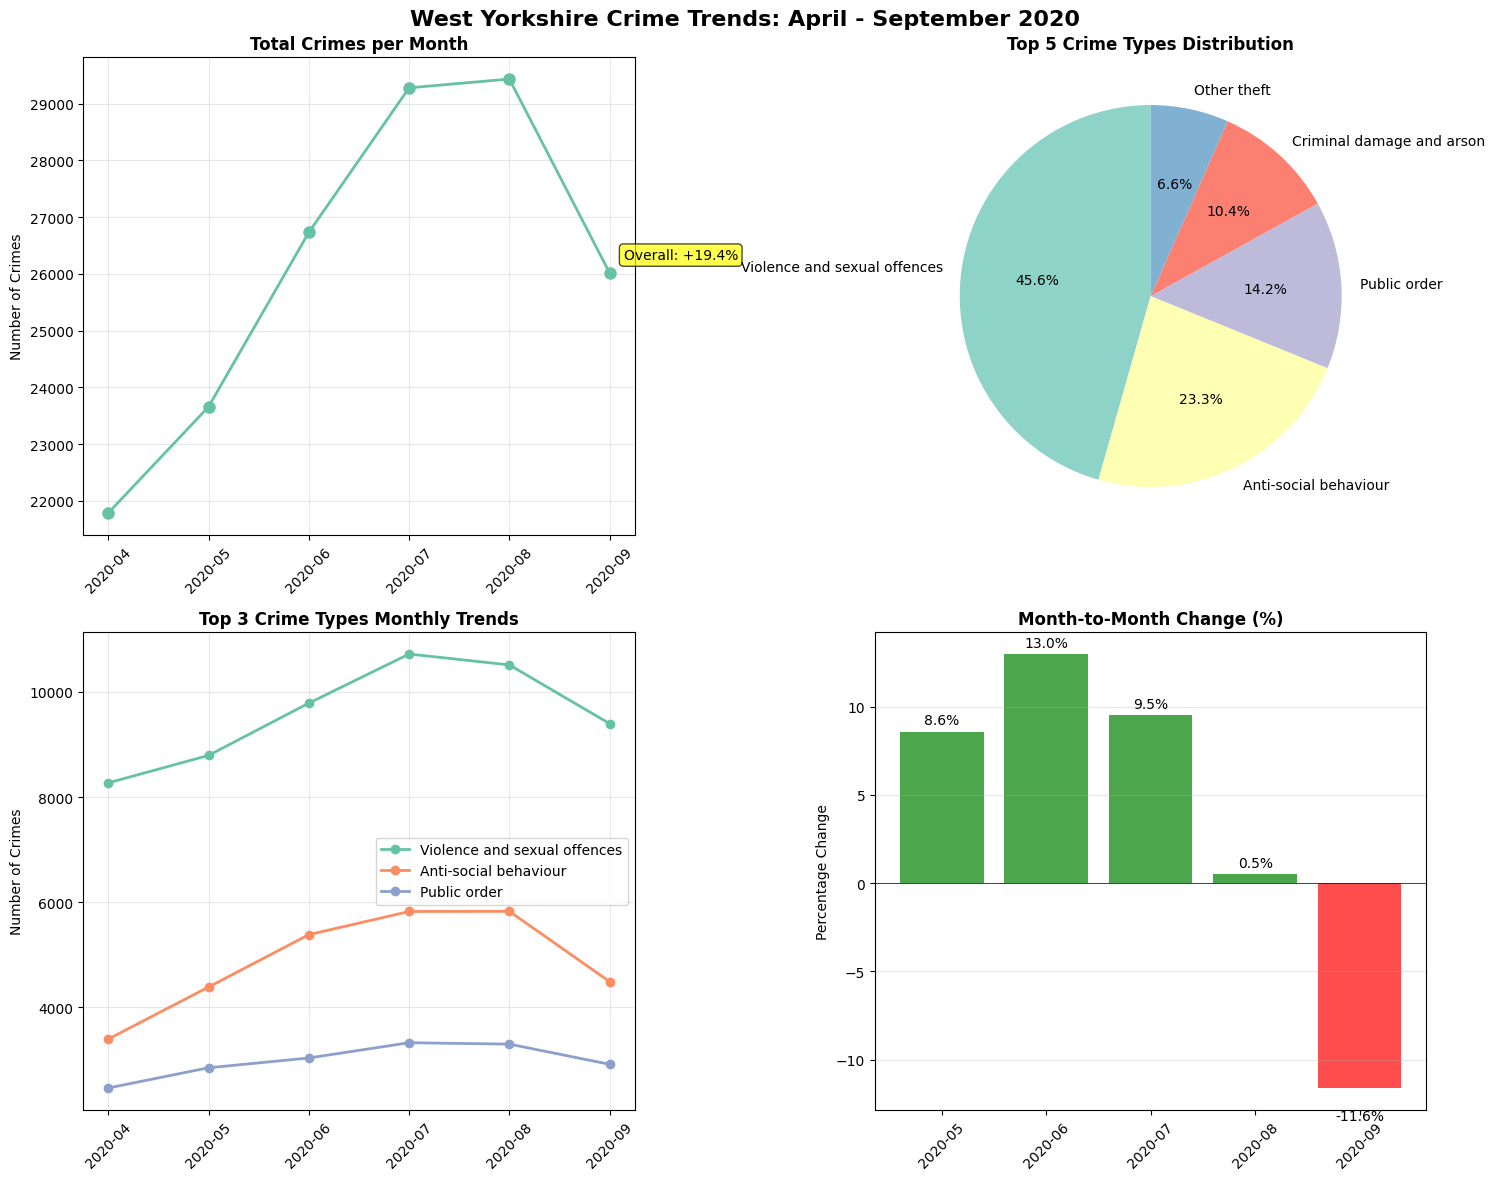

In [35]:
# 5. DATA VISUALIZATION
print("5. DATA VISUALIZATION")
# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Create subplot layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('West Yorkshire Crime Trends: April - September 2020', fontsize=16, fontweight='bold')

# Chart 1: Overall monthly trends
monthly_totals = clean_data.groupby('Month').size()
ax1.plot(monthly_totals.index, monthly_totals.values, marker='o', linewidth=2, markersize=8)
ax1.set_title('Total Crimes per Month', fontweight='bold')
ax1.set_ylabel('Number of Crimes')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add trend annotation
trend_pct = ((monthly_totals.iloc[-1] - monthly_totals.iloc[0]) / monthly_totals.iloc[0]) * 100
ax1.annotate(f'Overall: {trend_pct:+.1f}%', 
             xy=(monthly_totals.index[-1], monthly_totals.iloc[-1]),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

print("✓ Chart 1: Monthly totals created")

# Chart 2: Top 5 crime types distribution
top_5_crimes = clean_data['Crime type'].value_counts().head(5)
colors = plt.cm.Set3(range(len(top_5_crimes)))

ax2.pie(top_5_crimes.values, labels=top_5_crimes.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Top 5 Crime Types Distribution', fontweight='bold')

print("✓ Chart 2: Crime type distribution created")

# Chart 3: Trend comparison for top 3 crime types
top_3_crimes = clean_data['Crime type'].value_counts().head(3).index

for crime_type in top_3_crimes:
    crime_monthly = clean_data[clean_data['Crime type'] == crime_type].groupby('Month').size()
    ax3.plot(crime_monthly.index, crime_monthly.values, marker='o', label=crime_type, linewidth=2)

ax3.set_title('Top 3 Crime Types Monthly Trends', fontweight='bold')
ax3.set_ylabel('Number of Crimes')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

print("✓ Chart 3: Top crime types trends created")

# Chart 4: Month-to-month percentage changes
monthly_changes = monthly_totals.pct_change() * 100
monthly_changes = monthly_changes.dropna()

colors = ['green' if x > 0 else 'red' for x in monthly_changes.values]
bars = ax4.bar(range(len(monthly_changes)), monthly_changes.values, color=colors, alpha=0.7)
ax4.set_title('Month-to-Month Change (%)', fontweight='bold')
ax4.set_ylabel('Percentage Change')
ax4.set_xticks(range(len(monthly_changes)))
ax4.set_xticklabels(monthly_changes.index, rotation=45)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3 if height > 0 else -15),
                textcoords="offset points",
                ha='center', va='bottom' if height > 0 else 'top')

print("✓ Chart 4: Monthly changes created")

plt.tight_layout()
plt.show()